In [1]:
! pip install -q "diffusers==0.30.3"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 34.9 MB/s eta 0:00:00


### The DiffusionPipeline downloads and caches all modeling, tokenization, and scheduling components.

In [ ]:
from diffusers import DiffusionPipeline, EulerDiscreteScheduler

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", use_safetensors=True)

In [3]:
pipeline

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.30.3",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [4]:
# Swapping schedulers
pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)

In [ ]:
pipeline.to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

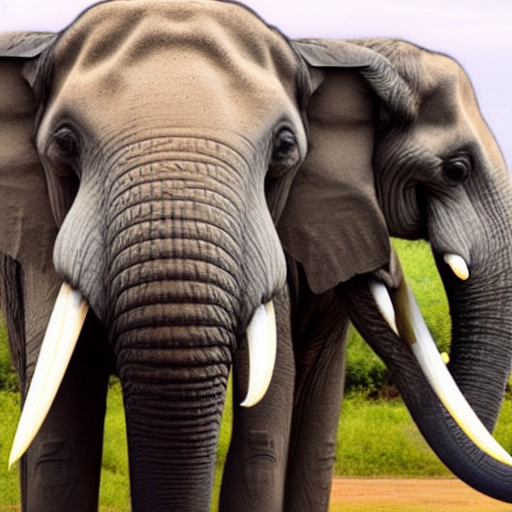

In [6]:
image = pipeline("Create the image an elephant eat banana").images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

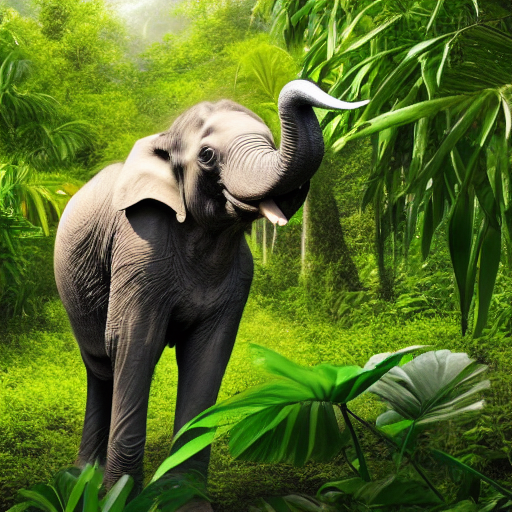

In [7]:
image = pipeline("A majestic elephant standing in a lush jungle, gently grasping a ripe yellow banana with its trunk.").images[0]
image

### Schedulers with model

In [8]:
from diffusers import UNet2DModel, DDPMScheduler
import torch


In [9]:
repo_id = "google/ddpm-cat-256"
model = UNet2DModel.from_pretrained(repo_id, use_safetensors=True)

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/455M [00:00<?, ?B/s]

###### These parameters can’t be changed after the model is created.

In [10]:
model.config

FrozenDict([('sample_size', 256),
            ('in_channels', 3),
            ('out_channels', 3),
            ('center_input_sample', False),
            ('time_embedding_type', 'positional'),
            ('freq_shift', 1),
            ('flip_sin_to_cos', False),
            ('down_block_types',
             ['DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'AttnDownBlock2D',
              'DownBlock2D']),
            ('up_block_types',
             ['UpBlock2D',
              'AttnUpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D']),
            ('block_out_channels', [128, 128, 256, 256, 512, 512]),
            ('layers_per_block', 2),
            ('mid_block_scale_factor', 1),
            ('downsample_padding', 0),
            ('downsample_type', 'conv'),
            ('upsample_type', 'conv'),
            ('dropout', 0.0),
            ('act_fn', 'si

In [11]:
torch.manual_seed(0)

noisy_sample = torch.randn(1, model.config.in_channels, model.config.sample_size, model.config.sample_size)
noisy_sample.shape

torch.Size([1, 3, 256, 256])

In [12]:
with torch.no_grad():
    noisy_residual = model(sample=noisy_sample, timestep=2).sample

In [13]:
noisy_residual

tensor([[[[-1.3894e+00, -2.0326e+00, -1.5895e-02,  ...,  4.4259e-01,
            2.8386e+00,  4.3367e-01],
          [ 8.5586e-01,  1.3170e-03, -3.3129e-02,  ..., -2.4933e+00,
            1.8574e+00, -3.3741e+00],
          [-8.9470e-01,  8.2015e-01, -9.9689e-01,  ...,  1.6609e+00,
           -5.6213e-02,  1.1832e+00],
          ...,
          [-1.2440e+00,  2.8138e+00,  2.4639e+00,  ..., -7.0141e-01,
            3.1160e+00, -2.5512e+00],
          [ 4.5772e-01, -2.9000e+00, -3.0779e+00,  ...,  9.3280e-01,
           -2.8279e+00,  1.7558e+00],
          [ 1.4687e+00, -4.0817e-01,  1.0682e+00,  ...,  7.0637e-01,
            7.2696e-01, -2.2928e+00]],

         [[-3.7491e-01, -1.4384e-01, -2.8355e-01,  ..., -7.4491e-01,
            4.4103e-02, -1.4426e+00],
          [-1.0419e+00,  2.3717e+00, -2.7351e+00,  ..., -3.2538e-01,
           -1.2031e+00,  4.4811e+00],
          [ 7.2407e-02, -2.1621e+00,  1.7969e+00,  ...,  4.4074e+00,
           -2.9217e-01, -2.1187e+00],
          ...,
     

###### You can also choose your own model and scheduler components separately to build a custom diffusion system.

In [14]:
scheduler = DDPMScheduler.from_pretrained(repo_id)
scheduler

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.30.3",
  "beta_end": 0.02,
  "beta_schedule": "linear",
  "beta_start": 0.0001,
  "clip_sample": true,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null,
  "variance_type": "fixed_small"
}

In [15]:
# To predict a slightly less noisy image, pass the following to the scheduler’s step() method
less_noisy_sample = scheduler.step(model_output=noisy_residual, timestep=2, sample=noisy_sample).prev_sample
less_noisy_sample.shape

torch.Size([1, 3, 256, 256])

In [16]:
# create a function that postprocesses and displays the denoised image as a PIL.Image:
import PIL.Image
import numpy as np


def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

In [17]:
# To speed up the denoising process, move the input and model to a GPU
model.to("cuda")
noisy_sample = noisy_sample.to("cuda")

  5%|▍         | 49/1000 [00:05<01:53,  8.35it/s]

'Image at step 50'

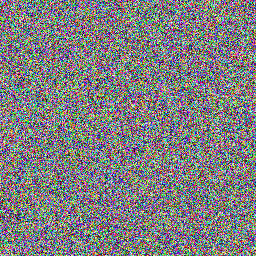

 10%|▉         | 99/1000 [00:11<01:49,  8.22it/s]

'Image at step 100'

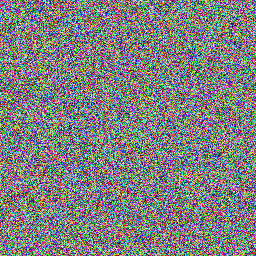

 15%|█▍        | 149/1000 [00:18<01:43,  8.23it/s]

'Image at step 150'

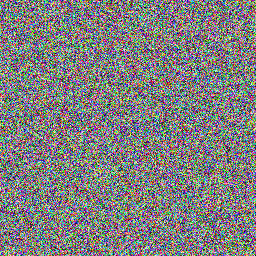

 20%|█▉        | 199/1000 [00:24<01:38,  8.17it/s]

'Image at step 200'

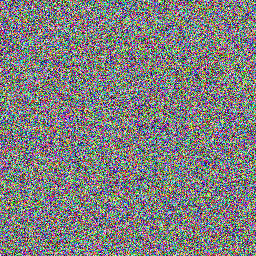

 25%|██▍       | 249/1000 [00:30<01:33,  8.00it/s]

'Image at step 250'

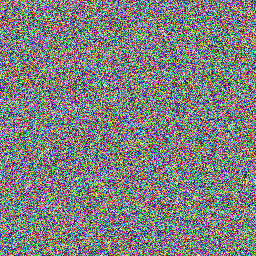

 30%|██▉       | 299/1000 [00:36<01:26,  8.12it/s]

'Image at step 300'

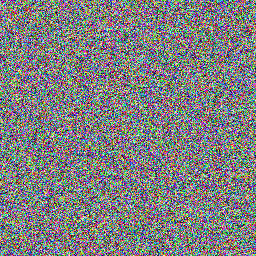

 35%|███▍      | 349/1000 [00:42<01:20,  8.10it/s]

'Image at step 350'

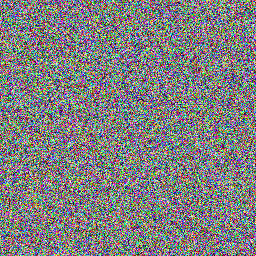

 40%|███▉      | 399/1000 [00:49<01:15,  7.99it/s]

'Image at step 400'

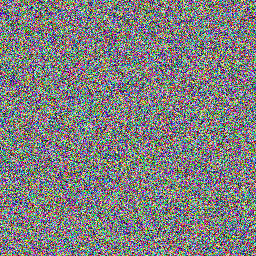

 45%|████▍     | 449/1000 [00:55<01:07,  8.21it/s]

'Image at step 450'

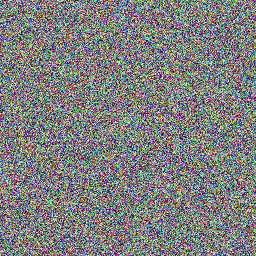

 50%|████▉     | 499/1000 [01:01<01:01,  8.19it/s]

'Image at step 500'

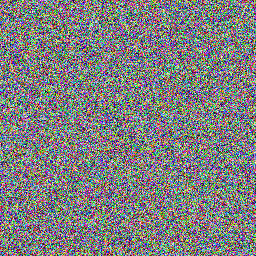

 55%|█████▍    | 549/1000 [01:07<00:54,  8.25it/s]

'Image at step 550'

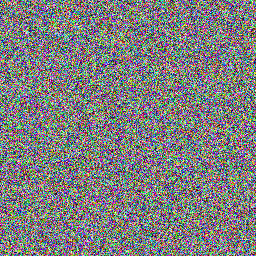

 60%|█████▉    | 599/1000 [01:13<00:50,  7.97it/s]

'Image at step 600'

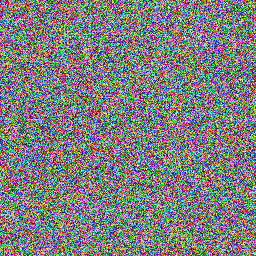

 65%|██████▍   | 649/1000 [01:19<00:42,  8.25it/s]

'Image at step 650'

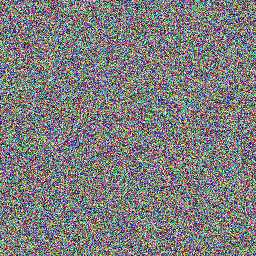

 70%|██████▉   | 699/1000 [01:25<00:36,  8.27it/s]

'Image at step 700'

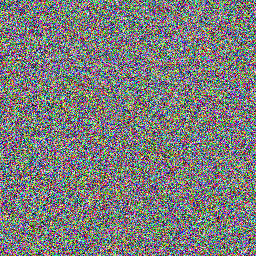

 75%|███████▍  | 749/1000 [01:31<00:30,  8.30it/s]

'Image at step 750'

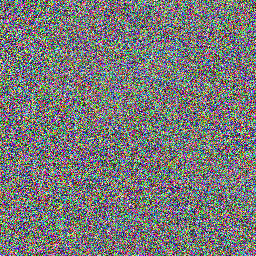

 80%|███████▉  | 799/1000 [01:37<00:24,  8.26it/s]

'Image at step 800'

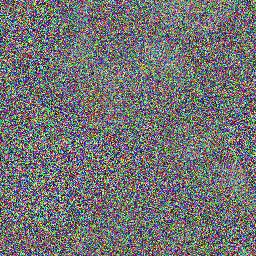

 85%|████████▍ | 849/1000 [01:44<00:18,  8.04it/s]

'Image at step 850'

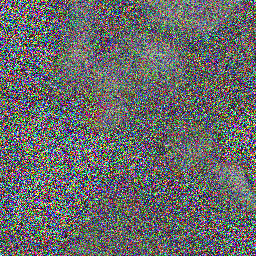

 90%|████████▉ | 899/1000 [01:50<00:12,  8.23it/s]

'Image at step 900'

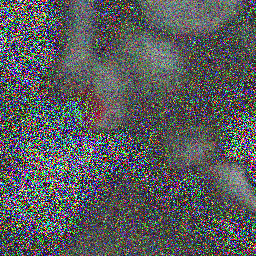

 95%|█████████▍| 949/1000 [01:56<00:06,  8.23it/s]

'Image at step 950'

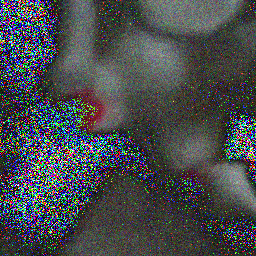

100%|█████████▉| 999/1000 [02:02<00:00,  8.37it/s]

'Image at step 1000'

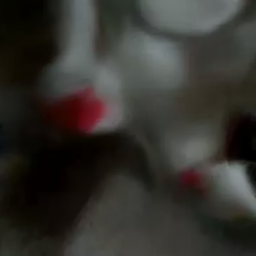

100%|██████████| 1000/1000 [02:02<00:00,  8.15it/s]


In [18]:
# Now create a denoising loop that predicts the residual of the less noisy sample
import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
    # 1. predict noise residual
    with torch.no_grad():
        residual = model(sample, t).sample

    # 2. compute less noisy image and set x_t -> x_t-1
    sample = scheduler.step(residual, t, sample).prev_sample

    # 3. optionally look at image
    if (i + 1) % 50 == 0:
        display_sample(sample, i + 1)